In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np
from matplotlib import colors
import glob 

In [15]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'depth'})
tmask = tmask.rename({'y' : 'gridY'})
tmask = tmask.rename({'x' : 'gridX'})
area = meshmask.e1t[0] * meshmask.e2t[0]
area = area.rename({'y' : 'gridY'})
area = area.rename({'x' : 'gridX'})

<xarray.DataArray (gridY: 898, gridX: 398)>
array([[185243.16065032, 190803.27747661, 194671.95335081, ...,
        231244.7650926 , 231250.57782804, 231256.38616842],
       [185143.22065913, 190700.12381496, 194576.64831066, ...,
        231218.44692684, 231224.25621104, 231230.06109609],
       [192573.97235167, 194186.67154445, 196368.25566354, ...,
        231178.55957774, 231184.36291238, 231190.16184242],
       ...,
       [234534.93463225, 234471.10689115, 234011.83013385, ...,
        178285.33125841, 177754.66344186, 177255.24489697],
       [236196.92164773, 236103.23266655, 235423.37323571, ...,
        177713.53480049, 177057.4920366 , 176408.64494444],
       [238326.73957072, 238154.91585215, 237066.18933351, ...,
        177165.37586233, 176356.42614012, 175503.8701075 ]])
Dimensions without coordinates: gridY, gridX

In [21]:
data_x304_y446 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_TA_and_DIC_x304_y446_20180101_20181231.nc'
data_x305_y446 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_TA_and_DIC_x305_y446_20180101_20181231.nc'
data_x304_y447 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_TA_and_DIC_x304_y447_20180101_20181231.nc'
data_x305_y447 = '/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_TA_and_DIC_x305_y447_20180101_20181231.nc'
x304_y446 = glob.glob(data_x304_y446)
x305_y446 = glob.glob(data_x305_y446)
x304_y447 = glob.glob(data_x304_y447)
x305_y447 = glob.glob(data_x305_y447)

dic_x304_y446 = xr.open_mfdataset(x304_y446, data_vars=['dissolved_inorganic_carbon']) 
ta_x304_y446 = xr.open_mfdataset(x304_y446, data_vars=['total_alkalinity']) 

dic_x305_y446 = xr.open_mfdataset(x305_y446, data_vars=['dissolved_inorganic_carbon']) 
ta_x305_y446 = xr.open_mfdataset(x305_y446, data_vars=['total_alkalinity']) 

dic_x304_y447 = xr.open_mfdataset(x304_y447, data_vars=['dissolved_inorganic_carbon']) 
ta_x304_y447 = xr.open_mfdataset(x304_y447, data_vars=['total_alkalinity']) 

dic_x305_y447 = xr.open_mfdataset(x305_y447, data_vars=['dissolved_inorganic_carbon']) 
ta_x305_y447 = xr.open_mfdataset(x305_y447, data_vars=['total_alkalinity']) 

In [45]:
x304_y446_dic = (dic_x304_y446['dissolved_inorganic_carbon'] * area.isel(gridY = 446, gridX = 304)).where(tmask.isel(depth = 26, gridY = 446, gridX = 304)).sum(axis = 1).sum(axis = 1).sum(axis = 1)
x304_y446_ta = (ta_x304_y446['total_alkalinity'] * area.isel(gridY = 446, gridX = 304)).where(tmask.isel(depth = 26, gridY = 446, gridX = 304)).sum(axis = 1).sum(axis = 1).sum(axis = 1)

x305_y446_dic = (dic_x305_y446['dissolved_inorganic_carbon'] * area.isel(gridY = 446, gridX = 305)).where(tmask.isel(depth = 25, gridY = 446, gridX = 305)).sum(axis = 1).sum(axis = 1).sum(axis = 1)
x305_y446_ta = (ta_x305_y446['total_alkalinity'] * area.isel(gridY = 446, gridX = 305)).where(tmask.isel(depth = 25, gridY = 446, gridX = 305)).sum(axis = 1).sum(axis = 1).sum(axis = 1)

x304_y447_dic = (dic_x304_y447['dissolved_inorganic_carbon'] * area.isel(gridY = 447, gridX = 304)).where(tmask.isel(depth = 27, gridY = 447, gridX = 304)).sum(axis = 1).sum(axis = 1).sum(axis = 1)
x304_y447_ta = (ta_x304_y447['total_alkalinity'] * area.isel(gridY = 447, gridX = 304)).where(tmask.isel(depth = 27, gridY = 447, gridX = 304)).sum(axis = 1).sum(axis = 1).sum(axis = 1)

x305_y447_dic = (dic_x305_y447['dissolved_inorganic_carbon'] * area.isel(gridY = 447, gridX = 305)).where(tmask.isel(depth = 26, gridY = 447, gridX = 305)).sum(axis = 1).sum(axis = 1).sum(axis = 1)
x305_y447_ta = (ta_x305_y447['total_alkalinity'] * area.isel(gridY = 447, gridX = 305)).where(tmask.isel(depth = 26, gridY = 447, gridX = 305)).sum(axis = 1).sum(axis = 1).sum(axis = 1)



Text(0.5, 0, 'Time')

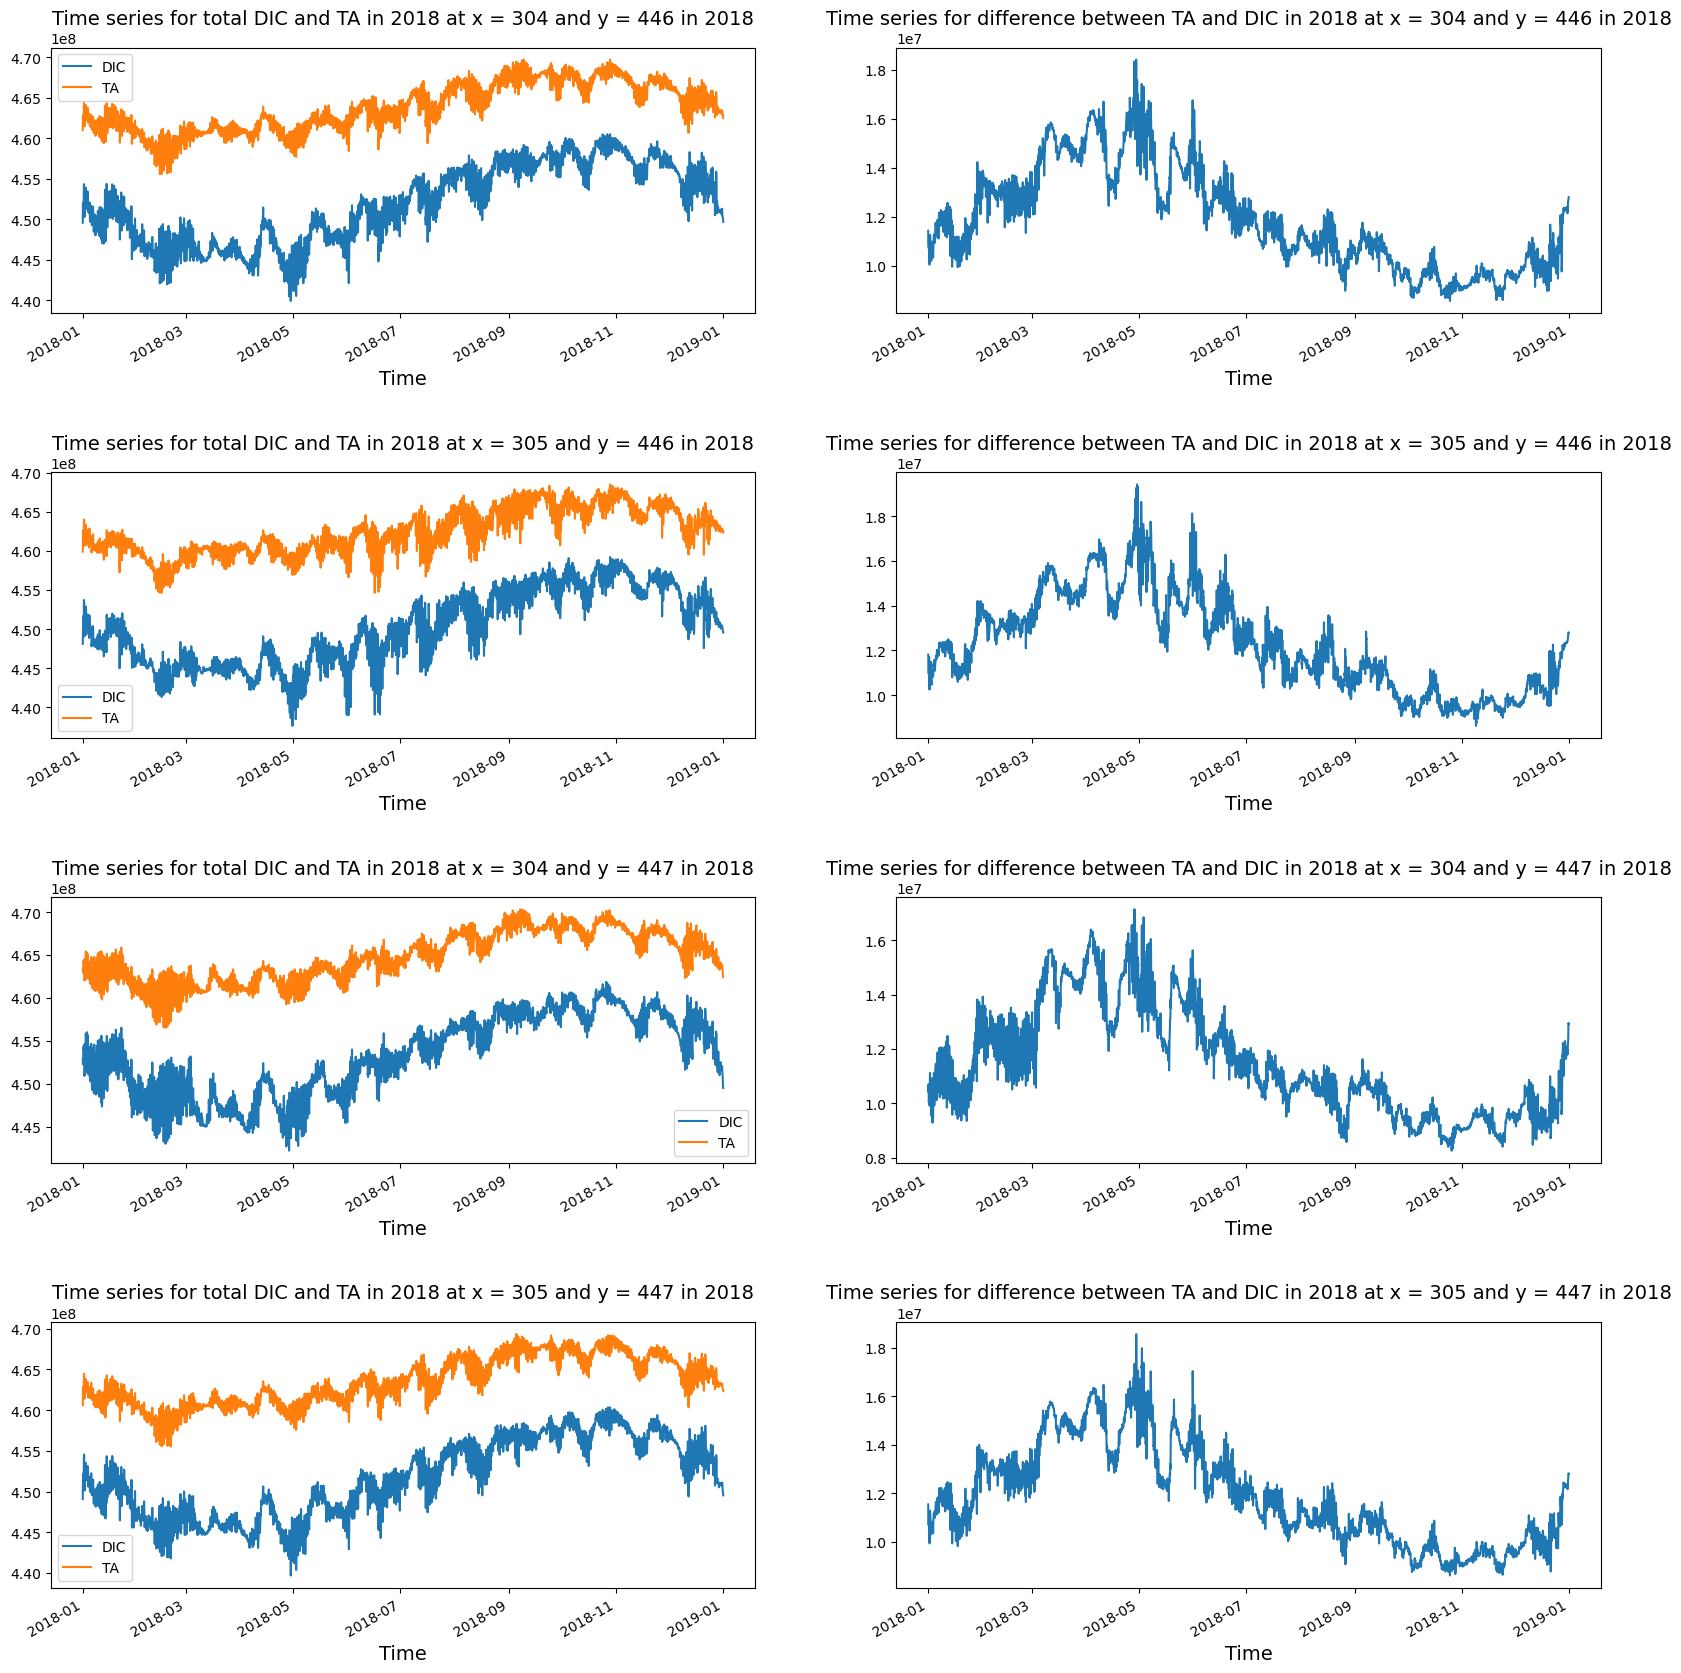

In [57]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20))
plt.subplots_adjust(hspace=0.6) 
x304_y446_dic.plot(ax= axs[0,0], label = 'DIC')
x304_y446_ta.plot(ax= axs[0,0], label = "TA")
axs[0,0].legend()
axs[0,0].set_title('Time series for total DIC and TA in 2018 at x = 304 and y = 446 in 2018', fontsize = 14)
axs[0,0].set_xlabel('Time', fontsize = 14)

diff_304_446 = x304_y446_ta - x304_y446_dic
diff_304_446.plot(ax= axs[0,1])
axs[0,1].set_title('Time series for difference between TA and DIC in 2018 at x = 304 and y = 446 in 2018', fontsize = 14)
axs[0,1].set_xlabel('Time', fontsize = 14)

x305_y446_dic.plot(ax= axs[1,0], label = 'DIC')
x305_y446_ta.plot(ax= axs[1,0], label = "TA")
axs[1,0].legend()
axs[1,0].set_title('Time series for total DIC and TA in 2018 at x = 305 and y = 446 in 2018', fontsize = 14)
axs[1,0].set_xlabel('Time', fontsize = 14)

diff_305_446 = x305_y446_ta - x305_y446_dic
diff_305_446.plot(ax= axs[1,1])
axs[1,1].set_title('Time series for difference between TA and DIC in 2018 at x = 305 and y = 446 in 2018', fontsize = 14)
axs[1,1].set_xlabel('Time', fontsize = 14)

x304_y447_dic.plot(ax= axs[2,0], label = 'DIC')
x304_y447_ta.plot(ax= axs[2,0], label = "TA")
axs[2,0].legend()
axs[2,0].set_title('Time series for total DIC and TA in 2018 at x = 304 and y = 447 in 2018', fontsize = 14)
axs[2,0].set_xlabel('Time', fontsize = 14)

diff_304_447 = x304_y447_ta - x304_y447_dic
diff_304_447.plot(ax= axs[2,1])
axs[2,1].set_title('Time series for difference between TA and DIC in 2018 at x = 304 and y = 447 in 2018', fontsize = 14)
axs[2,1].set_xlabel('Time', fontsize = 14)

x305_y447_dic.plot(ax= axs[3,0], label = 'DIC')
x305_y447_ta.plot(ax= axs[3,0], label = "TA")
axs[3,0].legend()
axs[3,0].set_title('Time series for total DIC and TA in 2018 at x = 305 and y = 447 in 2018', fontsize = 14)
axs[3,0].set_xlabel('Time', fontsize = 14)

diff_305_447 = x305_y447_ta - x305_y447_dic
diff_305_447.plot(ax= axs[3,1])
axs[3,1].set_title('Time series for difference between TA and DIC in 2018 at x = 305 and y = 447 in 2018', fontsize = 14)
axs[3,1].set_xlabel('Time', fontsize = 14)

